# Solutions to Exercise DFT 2
---

### Exercise 1

Generate a noisy signal of the form:
$$
f(t) = a_1\sin(2\pi f_1 t) + a_2\sin(2\pi f_2 t)+ a_3\cos(2\pi  f_3 t) + \mathrm{gaussia
n\,noise}
$$
with 

- $f_1=2, f_2=5, f_3=3$ 
- $a_1=1.2, a_2=a_3=1$ 
- For the Gaussian use: https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randn.html with $\sigma=0.5$. **Note:** Values from that function are sampled from a univariate Gaussian distribution of mean $\mu=0$ and variance $\sigma=1$. For random samples from the normal Gaussian distribution $N(\mu, \sigma^2)$ use: sigma*np.random.randn(...) + mu.



- Suppose you sample the signal with $f_s=200$ for $T=10$. Plot the discrete Signal (i.e. $f_n$ vs. $t_n$).
- Calculate the Fourierspectrum (i.e. $|c_n|$ over $f_n$).
- Apply an amplitude filter to seperate signal and noise.
- Plot (in two different plots)
    - the denoised signal
    - the noise
- Calculate the signal-to-noise-ratio (SNR), which is defined as 
$$
\mathrm{SNR} = \frac{\sigma(f_{\mathrm{signal}})}{\sigma(f_{\mathrm{noise}})}\,.
$$
Here: $\sigma$ denotes the standard deviation (https://docs.scipy.org/doc/numpy/reference/generated/numpy.std.html).

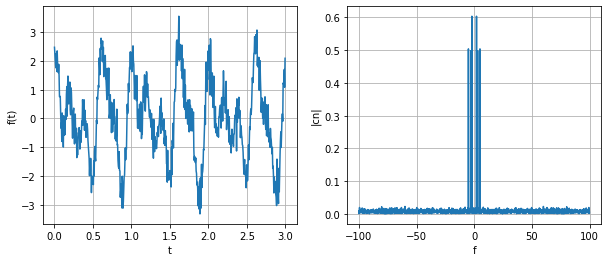

In [8]:
from numpy.fft import fft, fftshift, ifft, ifftshift
import numpy as np
import matplotlib.pyplot as plt

f1, f2, f3 = (2,5,3)
a1, a2, a3 = (1.2,1,1)
T, f_s     = (10,200)
N          = f_s*T
# generate signal
t=np.arange(0,T,1/f_s)
f=a1*np.sin(2*np.pi*f1*t)+a2*np.cos(2*np.pi*f2*t)+a3*np.cos(2*np.pi*f3*t)+0.4*np.random.randn(N)

# calculate frequency spectrum
c = 1/N*fftshift(fft(f))

freq =np.arange(-f_s/2,f_s/2,1/T)

# plot signal and frequency spectrum
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(t[t<3],f[t<3])
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()

plt.subplot(1,2,2)
plt.plot(freq,np.abs(c))
plt.xlabel('f')
plt.ylabel('|cn|')
plt.grid()

/opt/tljh/user/lib/python3.6/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


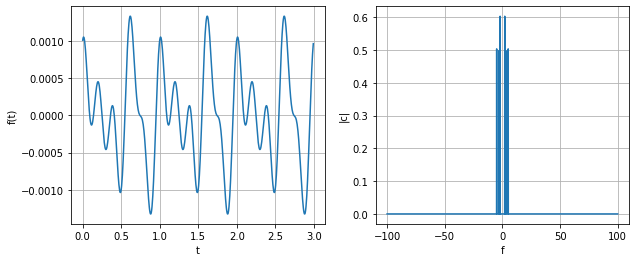

In [10]:
# Denoise signal via amplitude filter

c[np.abs(c)<0.2]=0 # c_mod
f_dn = ifft(ifftshift(c))


# Plot denoised signal and spectrum
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(t[t<3],f_dn[t<3])
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()

plt.subplot(1,2,2)
plt.plot(freq,abs(c))
plt.xlabel('f')
plt.ylabel('|c|')
plt.grid()

In [11]:
# SNR
f   = a1*np.sin(2*np.pi*f1*t)+a2*np.sin(2*np.pi*f2*t)+a3*np.cos(2*np.pi*f3*t)
fn  = 0.5*np.random.randn(t.size)
SNR = np.std(f)/np.std(fn)
SNR

2.6307181302994986

### Exercise 2

In this task, a simple version of a tuner is modeled using FFT. The file gitarre.dat contains the sound of playing a Guitars d-side. 
It was recorded for $T=1$s with $f_s=10^4$Hz. It should be checked if the d-side of the guitar is tuned.

> (a) Plot the spectrum $|c_n|$ (symmetric around zero). Argue physically why the spectrum contains peaks at regular intervals?

> (b) The nominal frequency of the d-side is $f_d=146.83$Hz. To which excitation mode of the guitar side does this frequency belong? Which frequency $f_p$
of the spectrum is hence relevant for the tuner?

> (c) Write a python-script, which analyses if the guitar is tuned correctly. To this end set a tolerance frequency $f_t$ (e.g. $f_t =1$Hz)  and check,
whether the frequency $f_p$ is within $[f_d-f_t, f_d + f_t]$. 



In [24]:
from numpy.fft import fft, fftshift, ifft, ifftshift
from scipy.io.wavfile import write, read
from IPython.display import Audio
import numpy as np

f = np.loadtxt('gitarre.dat')
write('tmp1.wav',10000,f.astype('float32'))
Audio('tmp1.wav')

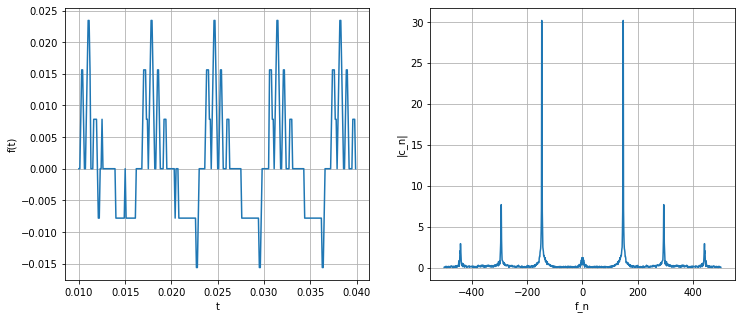

In [25]:
import numpy as np
import matplotlib.pyplot as plt

T, f_s = (1,10000)
N = f_s*T

# Read in data
f = np.loadtxt('gitarre.dat')
t = np.arange(0,T,1/f_s)
freq = np.arange(-f_s/2,f_s/2,1/T) 

# Find fourier spectrum via fft and shift spectrum
c = fftshift(fft(f)) 
freq = np.arange(-f_s/2,f_s/2,1/T)

# Plot first 0.1 s of the signal and the spectrum of the whole signal
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
plt.plot(t[100:400],f[100:400])
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()

plt.subplot(1,2,2)
plt.plot(freq[np.abs(freq)<500],abs(c[np.abs(freq)<500]))
plt.xlabel('f_n')
plt.ylabel('|c_n|')
plt.grid()

In [14]:
f_d = 146.83
f_t = 1

f_p = np.abs(freq[np.argmax(np.abs(c))])

print("The measured frequency of the d-string:", f_p, "Hz")

if np.abs(f_p-f_d)>f_t:
    print("Not tuned!")
else:
    print("Tuned!")

The measured frequency of the d-string: 147.0 Hz
Tuned!


In [27]:
a = np.array([-10,2,3,5,2])
a

array([-10,   2,   3,   5,   2])

In [37]:
freq[np.max(np.abs(c))==np.abs(c)]

array([-147.])

In [40]:
np.abs(freq[np.argmax(np.abs(c))])

147.0

### Exercise 3

Consider again the signal 
$$
f(t) = a_1\cos(2\pi f_1 t) + a_2\cos(2\pi f_2 t)+ a_3\cos(2\pi f_3 t)
$$
with 

- $f_1=2, f_2=5, f_3=3$ 
- $a_1=1.2, a_2=a_3=1$ 

> Write a python function analyse_f($f_s$,$T$), which analyses the signal $f(t)$ for a given sample frequency $f_s$ and period T. Your function should
- Plot the analytical signal $f(t)$ together with the sampled signal $\vec{f}$
- Generate the frequency spectrum (i.e. $|c_n|$ vs $f_n$) on the interval $\left[0,\frac{f_s}{2}\right]$. As a title the frequency spectrum should contain the three frequencies of the signal, which you calculate via
$$
f = \min_n \left(nf_s-f_{\mathrm{signal}}\right)
$$
- Check and explain your frequency spectrum as
    - you keep $T$ fix and enlarge $f_s$ starting from $f_s=2$.
    - you keep $f_s$ fix and enlarge $T$ starting from $T=1$.


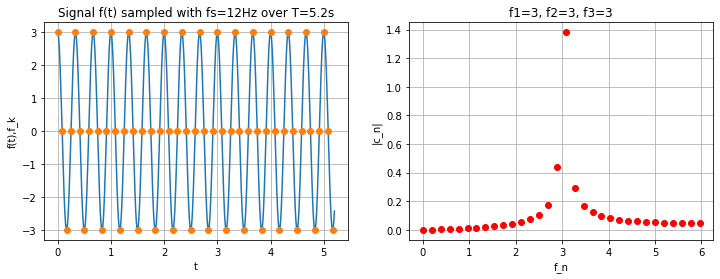

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, fftshift
from scipy.signal import windows

f1, f2, f3 = (3,3,3)
a1, a2, a3 = (1,1,1)

# signal as lambda-function
f = lambda t: a1*np.cos(2*np.pi*f1*t)+a2*np.cos(2*np.pi*f2*t)+a3*np.cos(2*np.pi*f3*t)

def analyse_f(fs,T):
    N = fs*T
    #window = windows.tukey(N)
    # Plot f(t) and f_k
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    ##############################
    t_plot = np.linspace(0,T,1000)
    t = np.arange(0,T,1/fs)
    ##############################
    plt.plot(t_plot,f(t_plot))
    plt.plot(t,f(t),'o')
    plt.grid()
    plt.xlabel('t')
    plt.ylabel('f(t),f_k')
    plt.title('Signal f(t) sampled with fs={}Hz over T={}s'.format(fs,T))
    # Generate and plot spectrum
    plt.subplot(1,2,2)
    #############
    c = 1/N*fft(f(t))
    freq = np.arange(0,fs,1/T)
    #############
    plt.plot(freq[:np.int(N/2+1)],np.abs(c[:np.int(N/2+1)]),'or')
    plt.grid()
    plt.xlabel('f_n')
    plt.ylabel('|c_n|')
    # Calculate frequencies f1, f2 and f3
    fa1 = np.min(np.abs(np.arange(0,10,1)*fs-f1)) 
    fa2 = np.min(np.abs(np.arange(0,10,1)*fs-f2)) 
    fa3 = np.min(np.abs(np.arange(0,10,1)*fs-f3)) 
    plt.title('f1={}, f2={}, f3={}'.format(fa1,fa2,fa3))

analyse_f(12,5.2)

### Exercise 4

Working principle of the fast work Fourier transform:

> (a) Go throught the following video (<20min) https://www.youtube.com/watch?v=EsJGuI7e_ZQ and explain in a short summary  how the FFT Algorithm works, i.e.
- Explain the fundamental principals (i.e. splitting into even and uneven samples, symmetries, ...)
- Explain how an FFT-Butterfly is generated given $N=2^3$
    
> (b) Write a python script, that compares the run time for DFT (copy the code from 2.1/Exercise 1) and the FFT for $N=2^{\nu}$ with $\nu=12,13,...$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
from numpy.fft import fft, fftshift

nu = 15
N = 2**nu
print('N={}'.format(N))
# Generate random signal with N = 2^nu samples
f = np.random.randn(N)
fft(f)

In [ ]:
# measure time to calculate spectrum via DFT
t1 = time()
#w = dftmtx(N)
#c = np.dot(w,f)
c = np.zeros(N,dtype=complex)
for n in range(N):
    c[n] = np.dot(np.exp(-1j*2*np.pi/N*n*np.arange(N)),f.reshape(N,1))
t1 = time()-t1
print('Time DFT: ', t1)

# measure time to calculate spectrum via FFT
t2 = time()
cn=fft(f)
t2 = time()-t2
print('Time FFT: ', t2)

print('Ratio (Time FFT)/(Time DFT) in %: ', t2/t1*100)